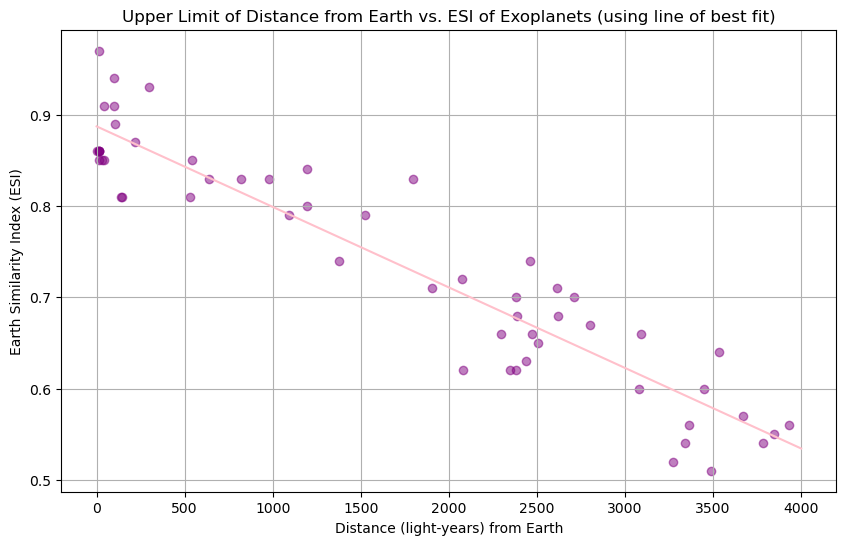

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data_file_path = "Python_RealExoplanetData.csv"  


data = pd.read_csv(data_file_path)


distances = data['Distance']  
esis = data['ESI']  

#ranges to delete
delete_ranges = [((0,2000),(0.5,0.7)), ((0,1000),(0.7,0.8)), ((2000,3000),(0.5,0.6)), ((4000,7000),(0.5,1))]


#filter out data points with that range
filtered_distances = []
filtered_esis = []
for distancesi, esisi in zip(distances,esis):
    in_delete_range = False 
    for delete_range_distances, delete_range_esis in delete_ranges:
        if delete_range_distances[0] <= distancesi <= delete_range_distances[1] and delete_range_esis[0] <= esisi <= delete_range_esis[1]:
            in_delete_range = True
            break
    if not in_delete_range:
        filtered_distances.append(distancesi)
        filtered_esis.append(esisi)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_distances, filtered_esis, color='purple', alpha=0.5)

slope, intercept = np.polyfit(filtered_distances, filtered_esis, 1)

segment_start = 0
segment_end = 4000

segment_filtered_distances = np.linspace(segment_start, segment_end, 100)
segment_filtered_esis = slope * segment_filtered_distances + intercept

plt.plot(segment_filtered_distances, segment_filtered_esis, color='pink', label='Line of Best Fit')

plt.xlabel('Distance (light-years) from Earth')
plt.ylabel('Earth Similarity Index (ESI)')
plt.title('Upper Limit of Distance from Earth vs. ESI of Exoplanets (using line of best fit)')
plt.grid(True)
plt.show()